In [12]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, accuracy_score

In [4]:
diabetes_dataset = pd.read_csv("/content/diabetes.csv")
diabetes_dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
diabetes_dataset.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

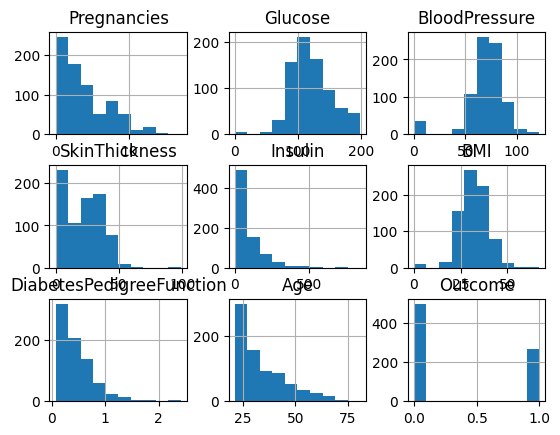

In [7]:
diabetes_dataset.hist()

In [8]:
diabetes_dataset['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


In [9]:
X = diabetes_dataset.drop(columns='Outcome', axis=1)
Y = diabetes_dataset['Outcome']

In [10]:
X_valtrain, X_test, Y_valtrain, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)
X_train, X_val, Y_train, Y_val = train_test_split(X_valtrain, Y_valtrain, test_size=0.25, stratify=Y_valtrain, random_state=2)

In [13]:
scaler = StandardScaler()
scaler.fit(X_train)  # hanya fit di data latih

# transform semua split
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [31]:
model = SVC(kernel='linear')  # kamu bisa coba 'linear', 'poly', 'sigmoid' juga
model.fit(X_train, Y_train)

SVC(kernel='linear')

In [32]:
predict = model.predict(X_train)
predictVal = model.predict(X_val)
predictTest = model.predict(X_test)

In [33]:
accuracy = accuracy_score(predict, Y_train)
print('Training Accuracy:', accuracy)

Training Accuracy: 0.7934782608695652


In [34]:
accuracyVal = accuracy_score(predictVal, Y_val)
print('Training Accuracy:', accuracyVal)

Training Accuracy: 0.7727272727272727


In [35]:
accuracyTest = accuracy_score(predictTest, Y_test)
print('Training Accuracy:', accuracyTest)

Training Accuracy: 0.7792207792207793


In [36]:
input_data = (0,137,40,35,168,43.1,2.288,33)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

[1]
